# **Data Collection**

In [1]:
import pandas as pd
file_path = '/content/drive/MyDrive/data.csv'
uncleaned_data = pd.read_csv(file_path, encoding='latin1')

In [2]:
uncleaned_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
uncleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
total_entries = len(uncleaned_data)
print("Total number of entries (rows) in the dataset:", total_entries)

Total number of entries (rows) in the dataset: 541909


In [5]:
uncleaned_data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# **1. Data Exploration and Cleaning**

In [6]:
uncleaned_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
missing_values = uncleaned_data.isnull().sum()
total_missing_values = missing_values.sum()
duplicate_rows = uncleaned_data[uncleaned_data.duplicated()]
total_duplicates = len(duplicate_rows)
print("Summary of Missing and Duplicate Values")
print(f"Total Missing Values: {total_missing_values}")
print("\nMissing Values by Column:")
print(missing_values)
num_duplicates = len(duplicate_rows)
print("Total number of duplicate rows:", num_duplicates)

Summary of Missing and Duplicate Values
Total Missing Values: 136534

Missing Values by Column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
Total number of duplicate rows: 5268


*Removed* *Duplicates*

In [8]:
uncleaned_data = uncleaned_data.drop_duplicates()

In [10]:
total_entries = len(uncleaned_data)
print("Total number of entries (rows) in the dataset:", total_entries)

Total number of entries (rows) in the dataset: 536641


*Some quantities in negative and some unit prices as 0*

In [11]:
negative_quantity_rows = uncleaned_data[uncleaned_data['Quantity'] < 0]

zero_unit_price_rows = uncleaned_data[uncleaned_data['UnitPrice'] <= 0]

print(f"Rows with negative quantities: {len(negative_quantity_rows)}")
print(f"Rows with unit prices less than and equal to 0: {len(zero_unit_price_rows)}")


Rows with negative quantities: 10587
Rows with unit prices less than and equal to 0: 2512


In [12]:
uncleaned_data = uncleaned_data[uncleaned_data['Quantity'] >= 0]
uncleaned_data = uncleaned_data[uncleaned_data['UnitPrice'] > 0]
print("Rows with negative quantities and unit prices equal to 0 have been removed.")
print(f"Remaining rows in dataset: {len(uncleaned_data)}")

Rows with negative quantities and unit prices equal to 0 have been removed.
Remaining rows in dataset: 524878


In [15]:
uncleaned_data = uncleaned_data.dropna(subset=['Description'])


In [16]:
uncleaned_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132186
Country             0
dtype: int64

In [17]:
total_entries = len(uncleaned_data)
print("Total number of entries (rows) in the dataset:", total_entries)

Total number of entries (rows) in the dataset: 524878


*Handling Missing Values in Customer Id*

In [18]:

def impute_customer_id(cleaned_data, group_columns):
    for col in group_columns:
        uncleaned_data['CustomerID'] = uncleaned_data.groupby(col)['CustomerID'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else pd.NA))
    return uncleaned_data

group_columns = ['InvoiceNo', 'Country', 'StockCode']

data_imputed = impute_customer_id(uncleaned_data, group_columns)

remaining_missing = data_imputed['CustomerID'].isnull().sum()
print(f"Remaining missing CustomerID values: {remaining_missing}")

data_imputed.head(10)


Remaining missing CustomerID values: 0


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [19]:
total_entries = len(uncleaned_data)
print("Total number of entries (rows) in the dataset:", total_entries)

Total number of entries (rows) in the dataset: 524878


In [20]:
missing_values = uncleaned_data.isnull().sum()
total_missing_values = missing_values.sum()
print(f"Total Missing Values: {total_missing_values}")
print("\nMissing Values by Column:")
print(missing_values)

Total Missing Values: 0

Missing Values by Column:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [23]:
cleaned_data = uncleaned_data

In [21]:
summary_statistics = uncleaned_data.describe()
summary_statistics

,Quantity,UnitPrice,CustomerID
count,524878.000000,524878.000000,524878.000000
mean,10.616600,3.922573,15922.453585
std,156.280031,36.093028,1851.495344
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,14367.000000
50%,4.000000,2.080000,16243.000000
75%,11.000000,4.130000,17841.000000
max,80995.000000,13541.330000,18287.000000


***Summary of the dataset***

In [24]:
total_transactions = cleaned_data['InvoiceNo'].nunique()
total_sales = (cleaned_data['Quantity'] * cleaned_data['UnitPrice']).sum()

average_transaction_value = total_sales / total_transactions
summary = {
    'Total Number of Transactions': total_transactions,
    'Total Sales': total_sales,
    'Average Transaction Value': average_transaction_value
}

summary


{'Total Number of Transactions': 19960,
 'Total Sales': 10642110.804,
 'Average Transaction Value': 533.1718839679359}

***Converting the InvoiceDate column to a datetime format and extract relevant time-based features***

In [25]:

cleaned_data['InvoiceDate'] = pd.to_datetime(cleaned_data['InvoiceDate'], format='%m/%d/%Y %H:%M')

cleaned_data['Year'] = cleaned_data['InvoiceDate'].dt.year
cleaned_data['Month'] = cleaned_data['InvoiceDate'].dt.month
cleaned_data['Day'] = cleaned_data['InvoiceDate'].dt.day
cleaned_data['Hour'] = cleaned_data['InvoiceDate'].dt.hour

cleaned_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8


In [26]:
cleaned_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8


# **2.	Descriptive Analysis:**



1.  Calculate the total revenue generated from sales.
2.  Identify the top 10 best-selling products by revenue.
3.  Determine the total number of unique customers.




In [27]:


cleaned_data['TotalPrice'] = cleaned_data['Quantity'] * cleaned_data['UnitPrice']
total_revenue = cleaned_data['TotalPrice'].sum()

top_10_products = cleaned_data.groupby('StockCode')['TotalPrice'].sum().nlargest(10)

total_unique_customers = cleaned_data['CustomerID'].nunique()

print("Total Revenue Generated from Sales: $", total_revenue)
print("\nTop 10 Best-Selling Products by Revenue:")
print(top_10_products)
print("\nTotal Number of Unique Customers:", total_unique_customers)

Total Revenue Generated from Sales: $ 10642110.804

Top 10 Best-Selling Products by Revenue:
StockCode
DOT       206248.77
22423     174156.54
23843     168469.60
85123A    104462.75
47566      99445.23
85099B     94159.81
23166      81700.92
POST       78101.88
M          77750.27
23084      66870.03
Name: TotalPrice, dtype: float64

Total Number of Unique Customers: 4338


# **3.	Sales Trends:**

In [34]:
import matplotlib.pyplot as plt
cleaned_data['Week'] = cleaned_data['InvoiceDate'].dt.isocalendar().week
# total sales
cleaned_data['TotalPrice'] = cleaned_data['Quantity'] * cleaned_data['UnitPrice']

# To get monthly sales
monthly_sales = cleaned_data.groupby(['Year', 'Month'])['TotalPrice'].sum().reset_index()
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))

# to get weekly sales
weekly_sales = cleaned_data.groupby(['Year', 'Week'])['TotalPrice'].sum().reset_index()
weekly_sales['Date'] = pd.to_datetime(weekly_sales['Year'].astype(str) + weekly_sales['Week'].astype(str) + '1', format='%Y%W%w')



Year          53
Week          53
TotalPrice    53
Date          53
dtype: int64


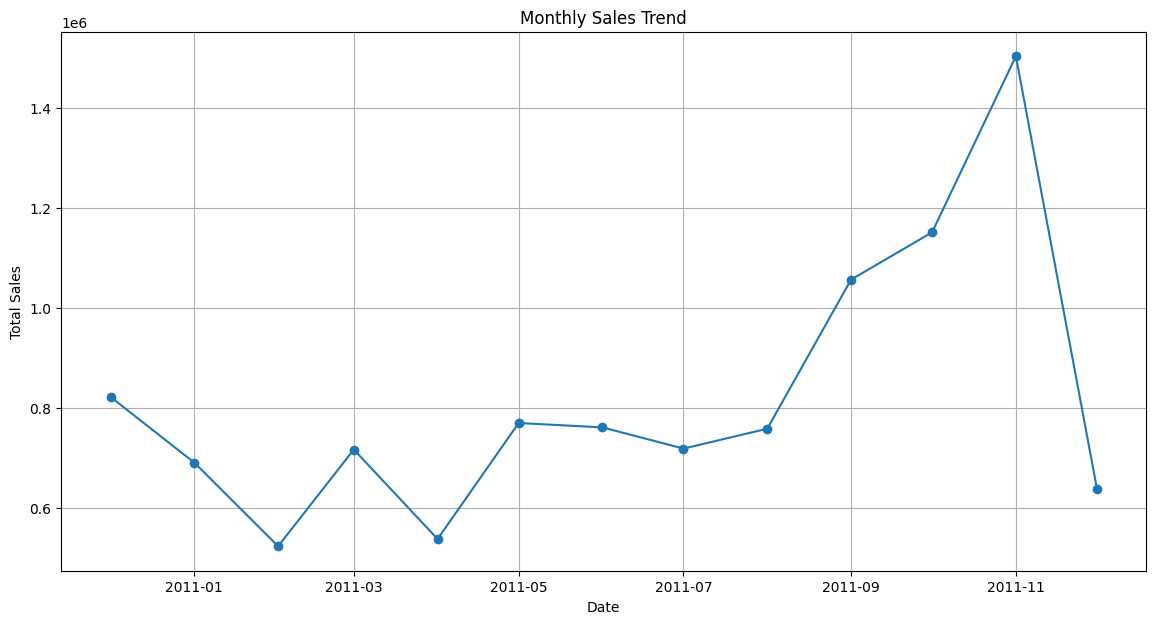

In [36]:

plt.figure(figsize=(14, 7))
plt.plot(monthly_sales['Date'], monthly_sales['TotalPrice'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


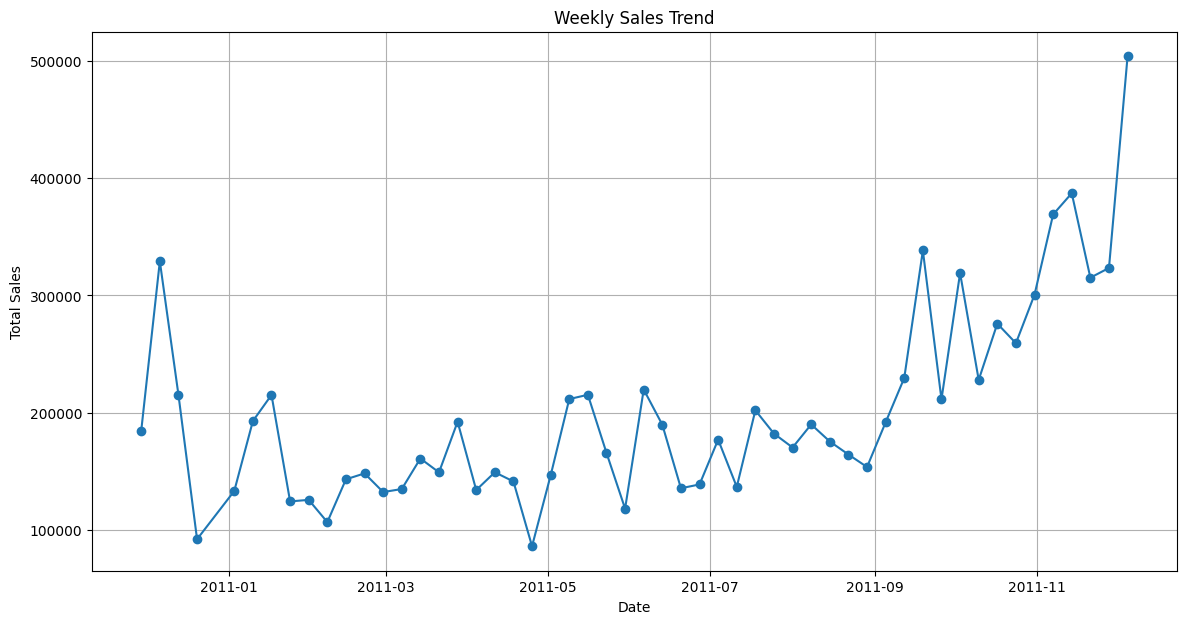

In [37]:

plt.figure(figsize=(14, 7))
plt.plot(weekly_sales['Date'], weekly_sales['TotalPrice'], marker='o')
plt.title('Weekly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [39]:

# Calculate changes for detailed analysis
monthly_sales['SalesChange'] = monthly_sales['TotalPrice'].diff()

# Calculate changes for detailed analysis
weekly_sales['SalesChange'] = weekly_sales['TotalPrice'].diff()

# Print detailed monthly sales change analysis
print("Monthly Sales Change Analysis:")
print(monthly_sales)

# Print detailed weekly sales change analysis
print("Weekly Sales Change Analysis:")
print(weekly_sales)

# Key observations from monthly sales data
january_sales = monthly_sales.loc[(monthly_sales['Year'] == 2011) & (monthly_sales['Month'] == 1), 'TotalPrice'].values[0]
march_sales = monthly_sales.loc[(monthly_sales['Year'] == 2011) & (monthly_sales['Month'] == 3), 'TotalPrice'].values[0]
april_sales = monthly_sales.loc[(monthly_sales['Year'] == 2011) & (monthly_sales['Month'] == 4), 'TotalPrice'].values[0]
november_sales = monthly_sales.loc[(monthly_sales['Year'] == 2011) & (monthly_sales['Month'] == 11), 'TotalPrice'].values[0]
december_sales = monthly_sales.loc[(monthly_sales['Year'] == 2011) & (monthly_sales['Month'] == 12), 'TotalPrice'].values[0]

print(f"January Sales: {january_sales}")
print(f"March Sales: {march_sales}")
print(f"April Sales: {april_sales}")
print(f"November Sales: {november_sales}")
print(f"December Sales: {december_sales}")


Monthly Sales Change Analysis:
    Year  Month   TotalPrice       Date  SalesChange
0   2010     12   821452.730 2010-12-01          NaN
1   2011      1   689811.610 2011-01-01  -131641.120
2   2011      2   522545.560 2011-02-01  -167266.050
3   2011      3   716215.260 2011-03-01   193669.700
4   2011      4   536968.491 2011-04-01  -179246.769
5   2011      5   769296.610 2011-05-01   232328.119
6   2011      6   760547.010 2011-06-01    -8749.600
7   2011      7   718076.121 2011-07-01   -42470.889
8   2011      8   757841.380 2011-08-01    39765.259
9   2011      9  1056435.192 2011-09-01   298593.812
10  2011     10  1151263.730 2011-10-01    94828.538
11  2011     11  1503866.780 2011-11-01   352603.050
12  2011     12   637790.330 2011-12-01  -866076.450
Weekly Sales Change Analysis:
    Year  Week  TotalPrice       Date  SalesChange
0   2010    48  184669.470 2010-11-29          NaN
1   2010    49  329108.220 2010-12-06   144438.750
2   2010    50  215357.040 2010-12-13  -1137

*Seasonal Patterns in Sales*

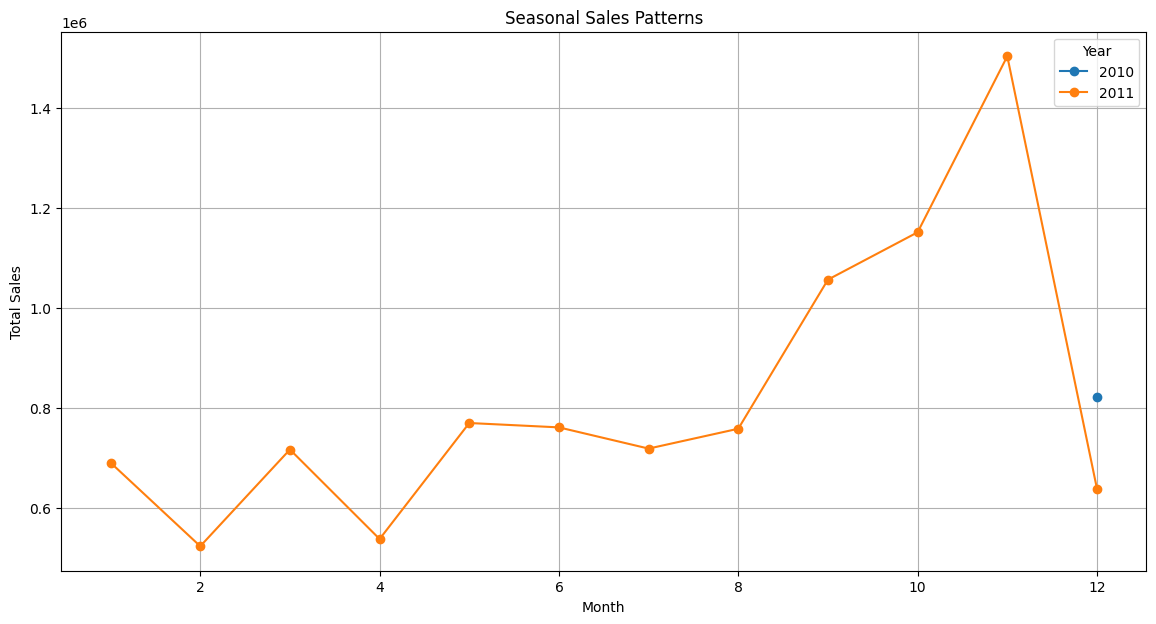

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

cleaned_data['InvoiceDate'] = pd.to_datetime(cleaned_data['InvoiceDate'])

cleaned_data['Year'] = cleaned_data['InvoiceDate'].dt.year
cleaned_data['Month'] = cleaned_data['InvoiceDate'].dt.month

monthly_sales = cleaned_data.groupby(['Year', 'Month'])['TotalPrice'].sum().reset_index()

sales_pivot = monthly_sales.pivot(index='Year', columns='Month', values='TotalPrice')

plt.figure(figsize=(14, 7))
for year in sales_pivot.index:
    plt.plot(sales_pivot.columns, sales_pivot.loc[year], marker='o', label=year)

plt.title('Seasonal Sales Patterns')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Year')
plt.grid(True)
plt.show()


# **4.	Customer Analysis**



1.   Average number of transactions per customer
2.   Average spend per customer
3.   top 10% of customers by total spend



In [51]:
cleaned_data['Revenue'] = cleaned_data['Quantity'] * cleaned_data['UnitPrice']

transactions_per_customer = cleaned_data.groupby('CustomerID')['InvoiceNo'].nunique()
average_transactions_per_customer = transactions_per_customer.mean()
print(f"Average number of transactions per customer: {average_transactions_per_customer}")



Average number of transactions per customer: 4.603503918856616


In [52]:

spend_per_customer = cleaned_data.groupby('CustomerID')['Revenue'].sum()
average_spend_per_customer = spend_per_customer.mean()
print(f"Average spend per customer: {average_spend_per_customer}")


Average spend per customer: 2453.229784232365


In [53]:

top_10_percent_threshold = spend_per_customer.quantile(0.90)
most_valuable_customers = spend_per_customer[spend_per_customer >= top_10_percent_threshold]
print("Top 10% of customers by total spend:")
print(most_valuable_customers)


Top 10% of customers by total spend:
CustomerID
12346.0    77183.60
12347.0     4310.00
12357.0     6207.67
12359.0     6310.03
12362.0     5226.23
             ...   
18223.0     6484.54
18225.0     5504.96
18226.0     5228.05
18229.0     7276.90
18251.0     4314.72
Name: Revenue, Length: 434, dtype: float64


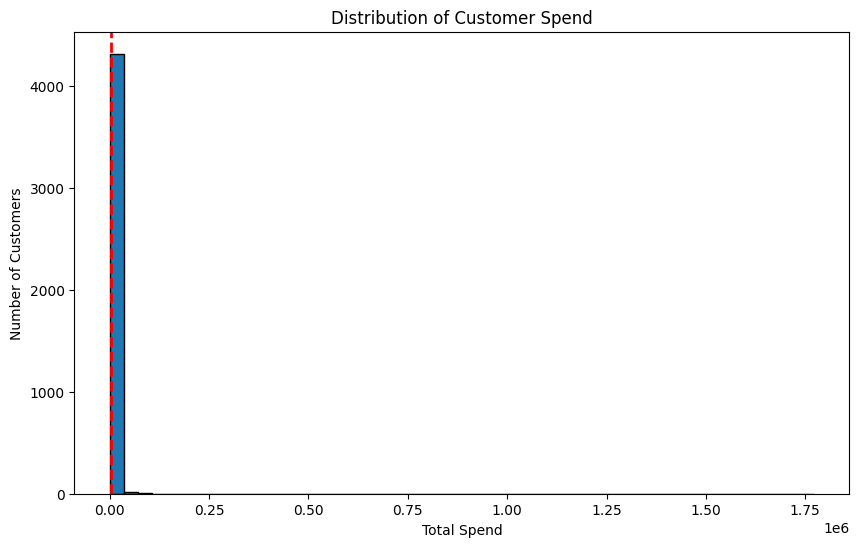

In [54]:
plt.figure(figsize=(10, 6))
plt.hist(spend_per_customer, bins=50, edgecolor='k')
plt.axvline(average_spend_per_customer, color='r', linestyle='dashed', linewidth=2)
plt.title('Distribution of Customer Spend')
plt.xlabel('Total Spend')
plt.ylabel('Number of Customers')
plt.show()

# **5.	Geographical Analysis:**

In [60]:
# Aggregate sales data by country
sales_by_country = cleaned_data.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
print("Total Revenue by Country:")
print(sales_by_country)


Total Revenue by Country:
Country
United Kingdom          9001744.094
Netherlands              285446.340
EIRE                     283140.520
Germany                  228678.400
France                   209625.370
Australia                138453.810
Spain                     61558.560
Switzerland               57067.600
Belgium                   41196.340
Sweden                    38367.830
Japan                     37416.370
Norway                    36165.440
Portugal                  33683.050
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20440.540
Denmark                   18955.340
Italy                     17483.240
Hong Kong                 15483.000
Cyprus                    13502.850
Austria                   10198.680
Israel                     8129.410
Poland                     7334.650
Greece                     4760.520
Unspecified                4740.940
Iceland                    4310.000
Canada                     366

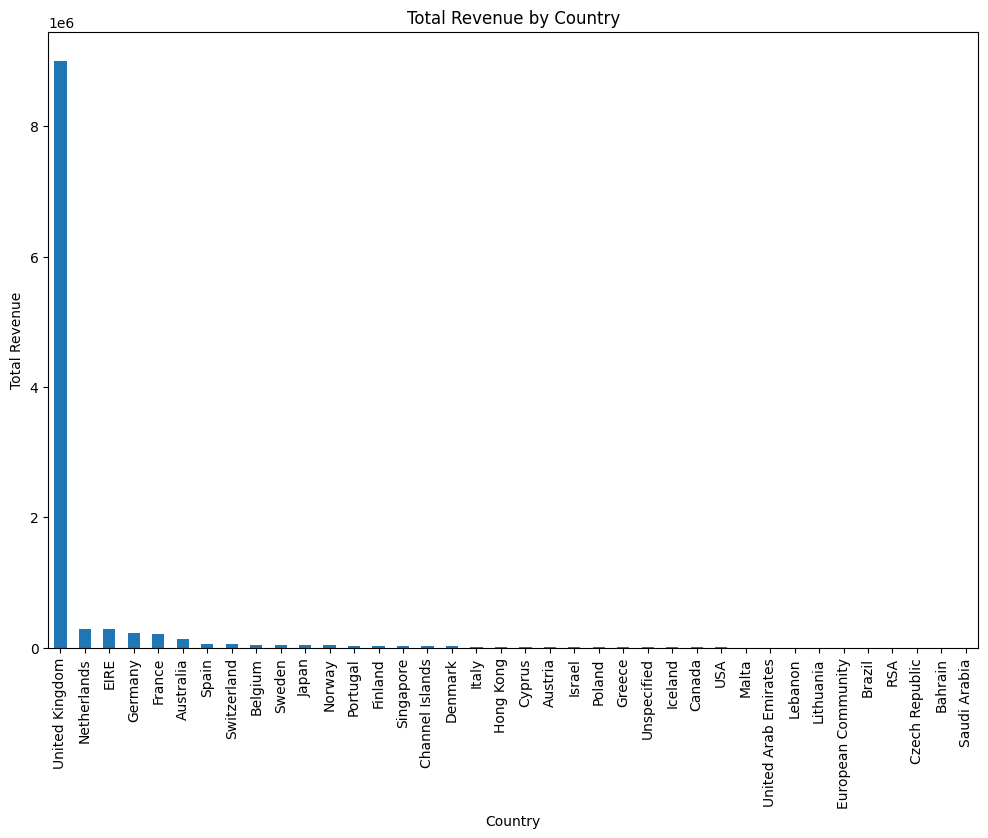

In [61]:

plt.figure(figsize=(12, 8))
sales_by_country.plot(kind='bar')
plt.title('Total Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.show()


In [62]:

sales_by_country_year = cleaned_data.groupby(['Country', 'Year'])['Revenue'].sum().unstack().fillna(0)
print("Total Revenue by Country and Year:")
print(sales_by_country_year)

sales_growth_by_country = sales_by_country_year.pct_change(axis='columns').fillna(0)
print("Year-over-Year Sales Growth by Country:")
print(sales_growth_by_country)


Total Revenue by Country and Year:
Year                       2010         2011
Country                                     
Australia                965.35   137488.460
Austria                  277.20     9921.480
Bahrain                  205.74      548.400
Belgium                 1809.91    39386.430
Brazil                     0.00     1143.600
Canada                     0.00     3666.380
Channel Islands          363.53    20077.010
Cyprus                  1587.07    11915.780
Czech Republic             0.00      826.740
Denmark                 1281.50    17673.840
EIRE                   10033.26   273107.260
European Community         0.00     1300.250
Finland                  892.80    21653.280
France                  9616.31   200009.060
Germany                15205.74   213472.660
Greece                     0.00     4760.520
Hong Kong                  0.00    15483.000
Iceland                  711.79     3598.210
Israel                     0.00     8129.410
Italy               

In [63]:

# Identify countries with significant sales growth or decline
threshold = 0.2
significant_growth = sales_growth_by_country[sales_growth_by_country > threshold]
significant_decline = sales_growth_by_country[sales_growth_by_country < -threshold]

print("Countries with Significant Sales Growth:")
print(significant_growth.dropna(how='all'))

print("Countries with Significant Sales Decline:")
print(significant_decline.dropna(how='all'))


Countries with Significant Sales Growth:
Year                  2010        2011
Country                               
Australia              NaN  141.423432
Austria                NaN   34.791775
Bahrain                NaN    1.665500
Belgium                NaN   20.761541
Brazil                 NaN         inf
Canada                 NaN         inf
Channel Islands        NaN   54.227932
Cyprus                 NaN    6.508037
Czech Republic         NaN         inf
Denmark                NaN   12.791526
EIRE                   NaN   26.220192
European Community     NaN         inf
Finland                NaN   23.253226
France                 NaN   19.798941
Germany                NaN   13.038952
Greece                 NaN         inf
Hong Kong              NaN         inf
Iceland                NaN    4.055157
Israel                 NaN         inf
Italy                  NaN   19.544350
Japan                  NaN    2.856071
Lebanon                NaN         inf
Malta                  

<Figure size 1200x800 with 0 Axes>

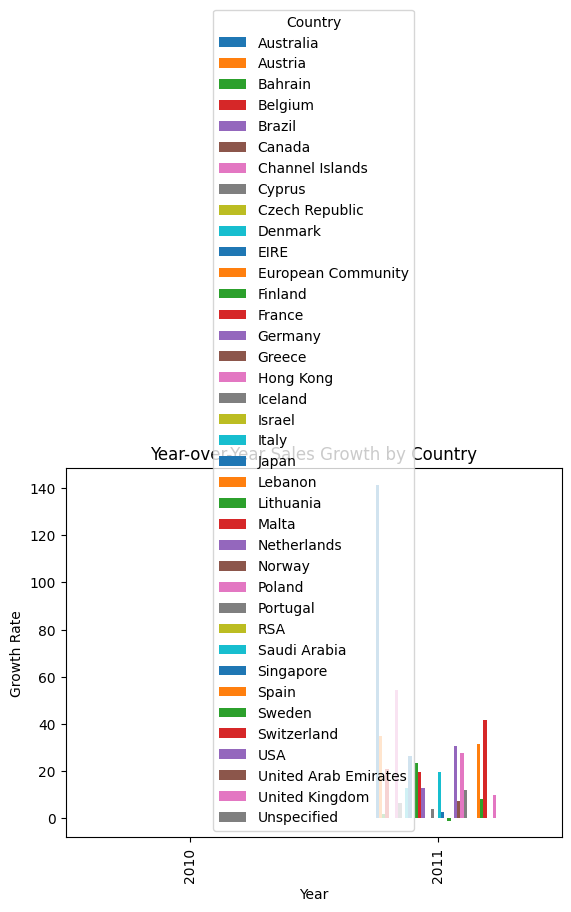

In [64]:

plt.figure(figsize=(12, 8))
sales_growth_by_country.T.plot(kind='bar')
plt.title('Year-over-Year Sales Growth by Country')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.show()


# **6. Machine Learning**

In [6]:
import pandas as pd
file_path = '/content/drive/MyDrive/upadted.csv'
cleaned_data = pd.read_csv(file_path, encoding='latin1')

<ipython-input-6-b9c5dde15787>:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  cleaned_data = pd.read_csv(file_path, encoding='latin1')


In [7]:
cleaned_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,TotalPrice,Week,Revenue,Frequency
0,536365,3407,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,36,2010,12,1,8,15.30,48,15.30,34
1,536365,2729,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,36,2010,12,1,8,20.34,48,20.34,34
2,536365,2953,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,36,2010,12,1,8,22.00,48,22.00,34
3,536365,2897,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,36,2010,12,1,8,20.34,48,20.34,34
4,536365,2896,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,36,2010,12,1,8,20.34,48,20.34,34


In [8]:
cleaned_data_copy = cleaned_data.copy()

***LOGISTIC REAGRESSION***

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

In [12]:
cleaned_data_copy['InvoiceDate'] = pd.to_datetime(cleaned_data_copy['InvoiceDate'])
cleaned_data_copy['NextMonthPurchase'] = (cleaned_data_copy['InvoiceDate'] >= cleaned_data_copy['InvoiceDate'].max() - pd.DateOffset(months=1)).astype(int)


In [13]:
label_encoders = {}
for column in ['Country']:
    le = LabelEncoder()
    cleaned_data_copy[column] = le.fit_transform(cleaned_data_copy[column])
    label_encoders[column] = le

In [14]:
cleaned_data_copy['Recency'] = (cleaned_data_copy['InvoiceDate'].max() - cleaned_data_copy.groupby('CustomerID')['InvoiceDate'].transform('max')).dt.days
cleaned_data_copy['Frequency'] = cleaned_data_copy.groupby('CustomerID')['InvoiceNo'].transform('nunique')
cleaned_data_copy['Monetary'] = cleaned_data_copy.groupby('CustomerID')['TotalPrice'].transform('sum')
cleaned_data_copy['AverageOrderValue'] = cleaned_data_copy['Monetary'] / cleaned_data_copy['Frequency']
cleaned_data_copy['Revenue'] = cleaned_data_copy.groupby('CustomerID')['Revenue'].transform('sum')


In [15]:

cleaned_data_copy = cleaned_data_copy.fillna(0)

features = cleaned_data_copy[['Recency', 'Frequency', 'Monetary', 'AverageOrderValue', 'Revenue', 'Country']]
target = cleaned_data_copy['NextMonthPurchase']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42, stratify=target)

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)


In [16]:
scaler = StandardScaler()
X_train_sm = scaler.fit_transform(X_train_sm)
X_test = scaler.transform(X_test)

In [20]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}


In [18]:

model = LogisticRegression(random_state=42, max_iter=1000)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_sm, y_train_sm)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

In [19]:

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')

Accuracy: 0.46
Precision: 0.22
Recall: 0.85
F1 Score: 0.35
ROC AUC Score: 0.67


***NAIVE BAYES CLASSIFIER***

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

In [22]:
label_encoders = {}
for column in ['Country']:
    le = LabelEncoder()
    cleaned_data_copy[column] = le.fit_transform(cleaned_data_copy[column])
    label_encoders[column] = le

In [23]:

cleaned_data_copy = cleaned_data_copy.fillna(0)

features = cleaned_data_copy[['Recency', 'Frequency', 'Monetary', 'AverageOrderValue', 'Revenue', 'Country']]
target = cleaned_data_copy['NextMonthPurchase']

smote = SMOTE(random_state=42)
features, target = smote.fit_resample(features, target)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42, stratify=target)


In [24]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

In [25]:

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')

cv_scores = cross_val_score(model, features, target, cv=5, scoring='accuracy')
print(f'Cross-validated Accuracy: {cv_scores.mean():.2f}')

Accuracy: 0.63
Precision: 0.58
Recall: 0.91
F1 Score: 0.71
ROC AUC Score: 0.62
Cross-validated Accuracy: 0.62
